Food Desert      No  Yes
County                  
Bronx           337    2
Napa             33    7
San Bernardino  219  150
San Francisco   193    3


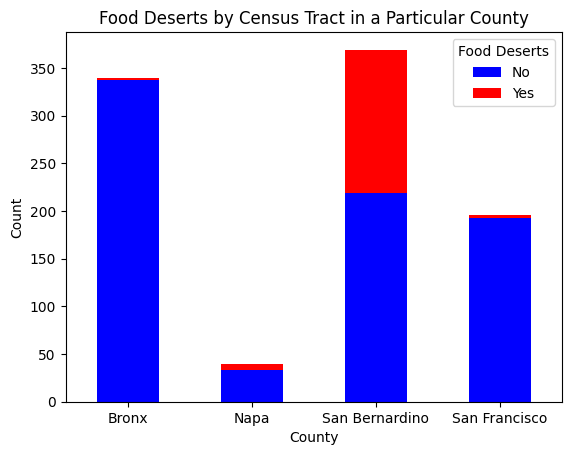

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load csv data
url = 'https://raw.githubusercontent.com/slromero/Project1/main/food_access_research_atlas%203.csv'
df = pd.read_csv(url)

# Filter for specified counties
selected_counties = ['Napa', 'San Francisco', 'Bronx', 'San Bernardino']
selected_df = df[df['County'].isin(selected_counties)]


# Rename column 'LA1and10' to 'Food Desert'
selected_df = selected_df.rename(columns={'LA1and10': 'Food Desert'})

# Map colors on graph
colors = {0: 'blue', 1: 'red'}
selected_df['Food Desert'] = selected_df['Food Desert'].map(colors)

# Create a vertically stacked bar chart
fig, ax = plt.subplots()
selected_df.groupby(['County', 'Food Desert']).size().unstack().plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'])

# Set labels and title
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Food Deserts by Census Tract in a Particular County')

# Customize legend labels
legend_labels = ['No', 'Yes']
ax.legend(legend_labels, title='Food Deserts')

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Print numeric values
numeric_values = selected_df.groupby(['County', 'Food Desert']).size().unstack()
numeric_values = numeric_values.rename(columns={'blue': 'No', 'red': 'Yes'})
print(numeric_values)

# Show the plot
plt.show()

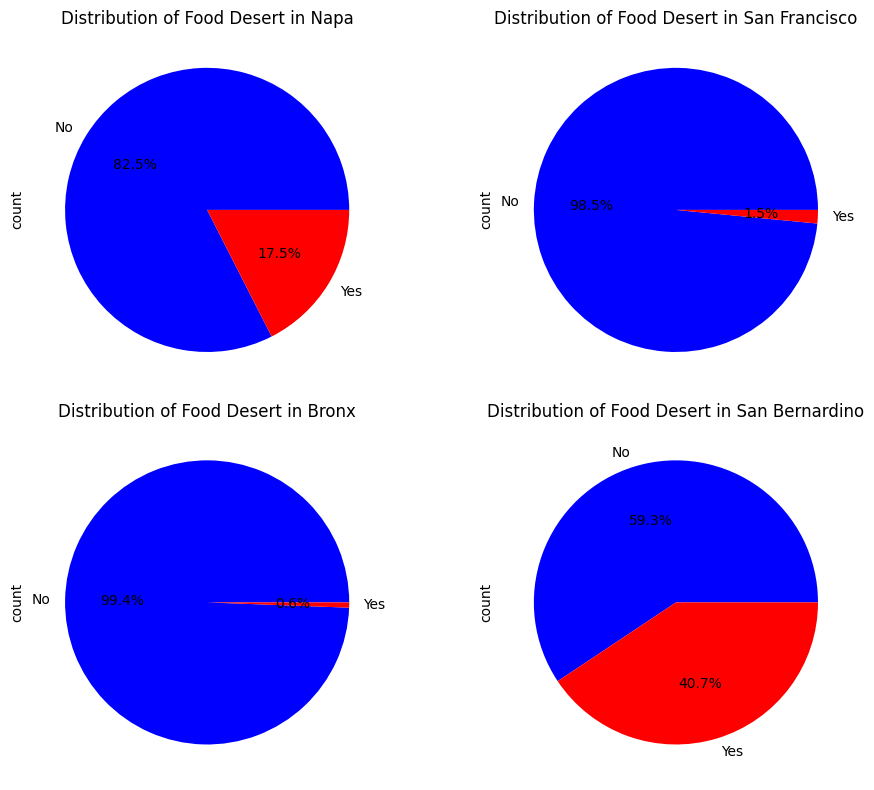

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each county and create pie chart
for i, county in enumerate(selected_counties):
    ax = axes[i // 2, i % 2]

    # Filter data for specific county
    selected_df = df[df['County'] == county]

    # Rename column 'LA1and10' to 'Food Desert'
    selected_df = selected_df.rename(columns={'LA1and10': 'Food Desert'})

    # Map values for 'Food Desert' to colors
    colors = {0: 'No', 1: 'Yes'}
    selected_df['Food Desert'] = selected_df['Food Desert'].map(colors)

    # Create pie chart
    selected_df['Food Desert'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', colors=['blue', 'red'])

    # Set title for pie charts
    ax.set_title(f'Distribution of Food Desert in {county}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Total Population for Bronx based on Food Desert:
Food Desert
No     1368928
Yes      16180
Name: POP2010, dtype: int64


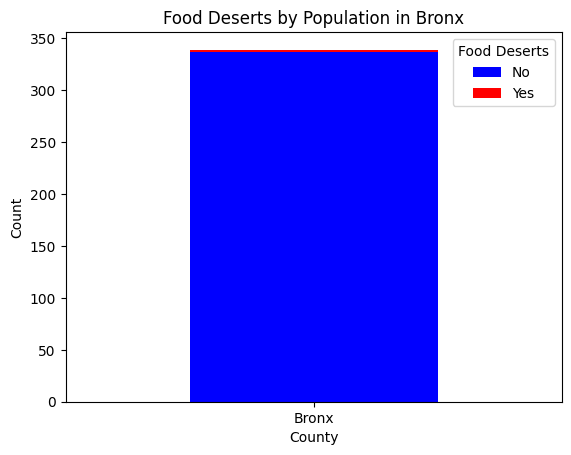

Total Population for Napa based on Food Desert:
Food Desert
No     113492
Yes     22992
Name: POP2010, dtype: int64


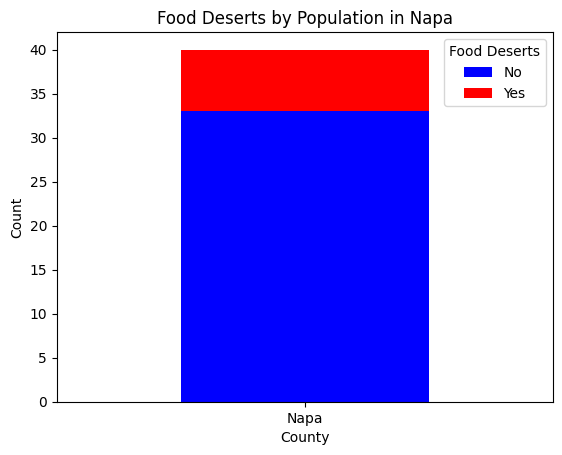

Total Population for San Bernardino based on Food Desert:
Food Desert
No     1110234
Yes     924976
Name: POP2010, dtype: int64


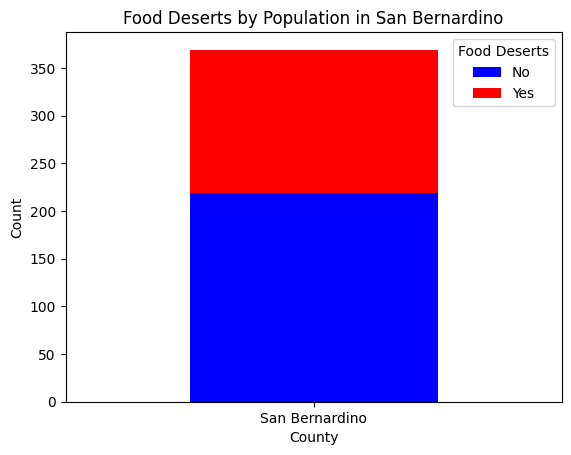

Total Population for San Francisco based on Food Desert:
Food Desert
No     800199
Yes      5036
Name: POP2010, dtype: int64


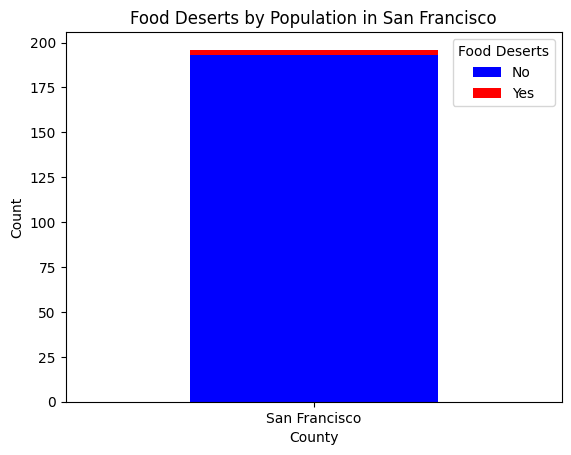

In [4]:
selected_counties = ['Bronx', 'Napa', 'San Bernardino', 'San Francisco']

# Create an empty dictionary to store DFs
county_dfs = {}

# Loop through each county and process the data
for county in selected_counties:
    # Filter data for the specific county
    county_df = df[df['County'] == county].copy()

    # Rename column 'LA1and10' to 'Food Desert'
    county_df = county_df.rename(columns={'LA1and10': 'Food Desert'})

    # Map values for 'Food Desert' to colors
    colors = {0: 'No', 1: 'Yes'}
    county_df['Food Desert'] = county_df['Food Desert'].map(colors)

    # Calculate the sum of 'POP2010' based on 'Food Desert'
    total_population = county_df.groupby('Food Desert')['POP2010'].sum()
    print(f"Total Population for {county} based on Food Desert:")
    print(total_population)

    # Save the processed DataFrame to the dictionary
    county_dfs[county] = county_df

    # Create a vertically stacked bar chart
    fig, ax = plt.subplots()
    county_df.groupby(['County', 'Food Desert']).size().unstack().plot(
        kind='bar', stacked=True, ax=ax, color=['blue', 'red']
    )

    # Set labels and title
    plt.xlabel('County')
    plt.ylabel('Count')
    plt.title(f'Food Deserts by Population in {county}')

    # Customize legend labels
    legend_labels = ['No', 'Yes']
    ax.legend(legend_labels, title='Food Deserts')

    # Rotate x-axis labels to be horizontal
    plt.xticks(rotation=0)

    # Show the plot for each county
    plt.show()

Urban counts by county:
Bronx:
Urban
Urban        335
Non-Urban      4
Name: count, dtype: int64

Napa:
Urban
Urban        31
Non-Urban     9
Name: count, dtype: int64

San Bernardino:
Urban
Urban        332
Non-Urban     37
Name: count, dtype: int64

San Francisco:
Urban
Urban        194
Non-Urban      2
Name: count, dtype: int64



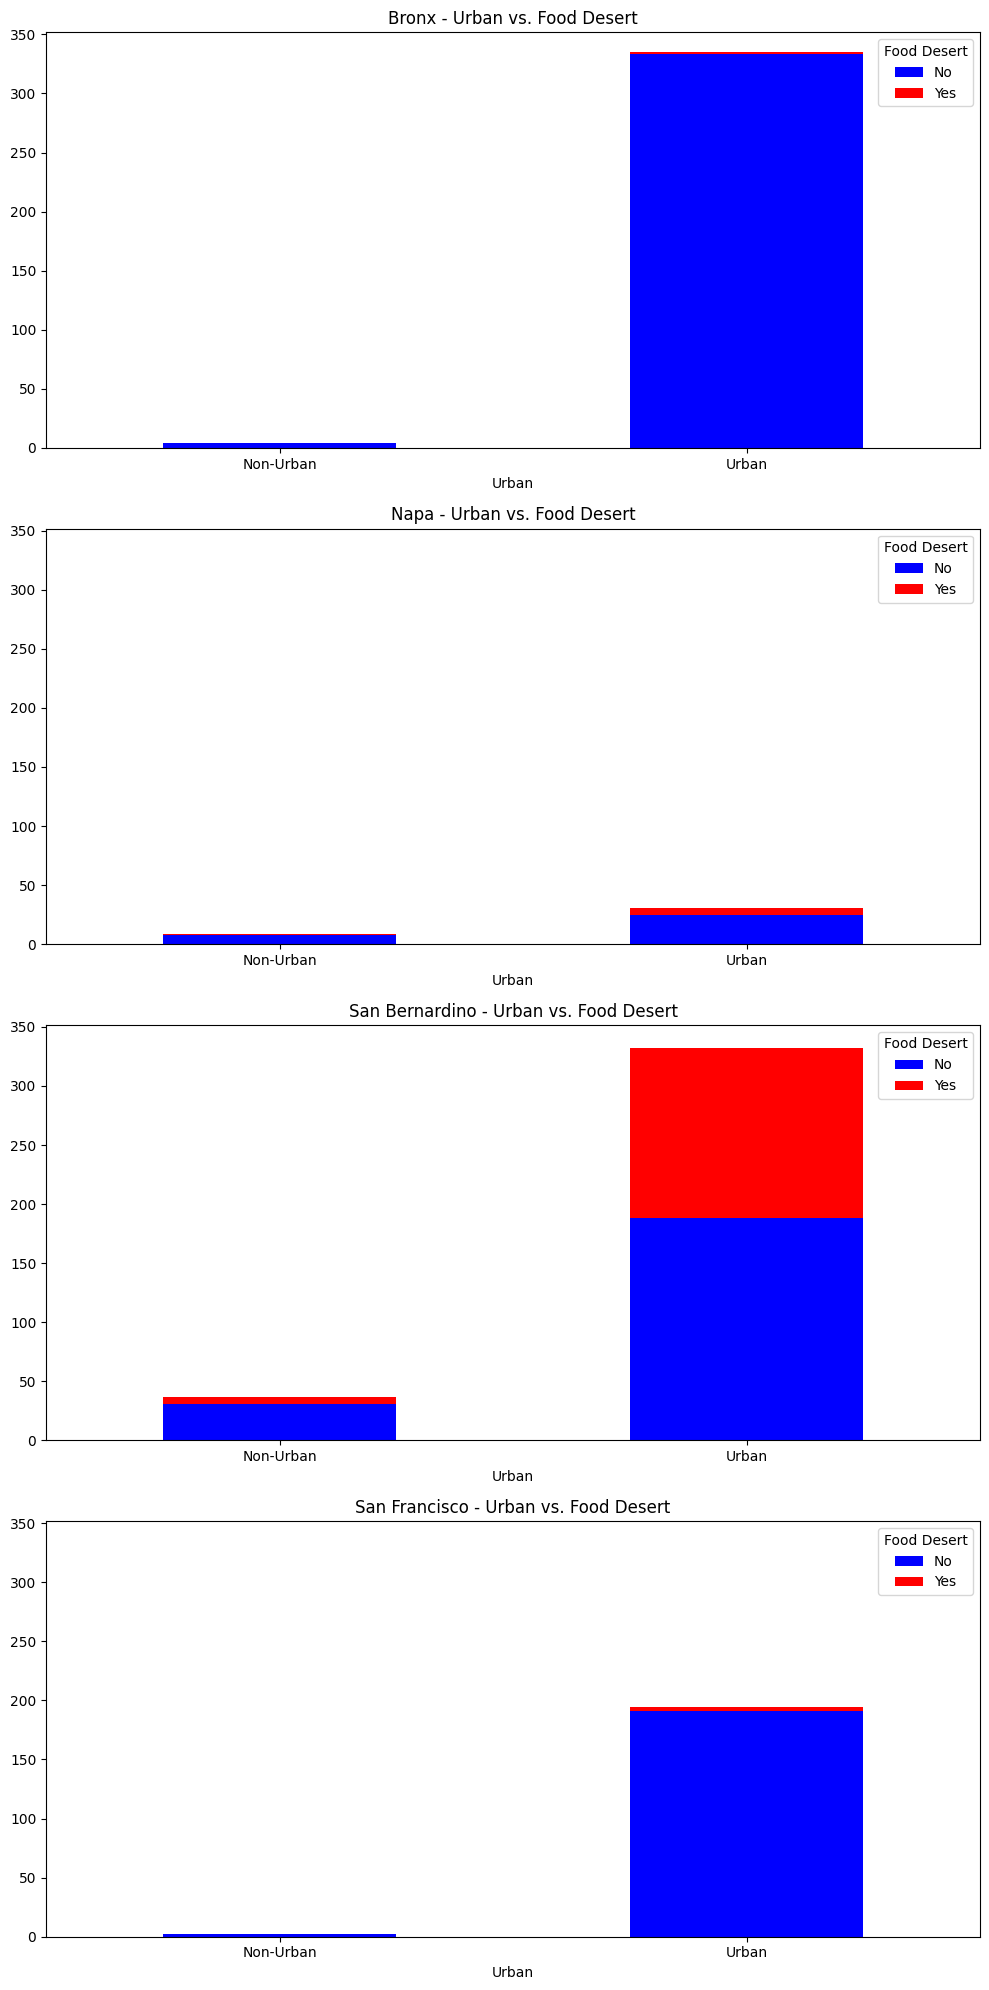

In [5]:
selected_counties = ["Bronx", "Napa", "San Bernardino", "San Francisco"]

# Initialize dictionaries to store the counts
urban_count_by_county = {}

# Iterate through selected counties and calculate counts
for county in selected_counties:
    county_data = df[df['County'] == county]
    urban_counts = county_data['Urban'].value_counts().rename({1: 'Urban', 0: 'Non-Urban'})
    urban_count_by_county[county] = urban_counts


# Display the results
print("Urban counts by county:")
for county, counts in urban_count_by_county.items():
    print(f"{county}:\n{counts}\n")

fig, axs = plt.subplots(len(selected_counties), 1, figsize=(10, 5 * len(selected_counties)), sharey=True)

# Iterate through selected counties and plot vertically stacked bar graphs
for i, county in enumerate(selected_counties):
    county_data = df[df['County'] == county]
    
    # Group by 'Urban' and 'LA1and10', and count occurrences
    counts = county_data.groupby(['Urban', 'LA1and10']).size().unstack(fill_value=0)
    
    # Plot the vertically stacked bar graph with color customization
    counts.plot(kind='bar', stacked=True, ax=axs[i], rot=0, color=['blue', 'red'])
    
    axs[i].set_title(f'{county} - Urban vs. Food Desert')
    axs[i].set_xlabel('Urban')
    
    # Customize the legend
    legend = axs[i].legend(title='Food Desert', loc='upper right')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

    # Change x-axis to Urban/Non-Urban
    axs[i].set_xticklabels(['Non-Urban', 'Urban'], rotation=0)

plt.tight_layout()
plt.show()

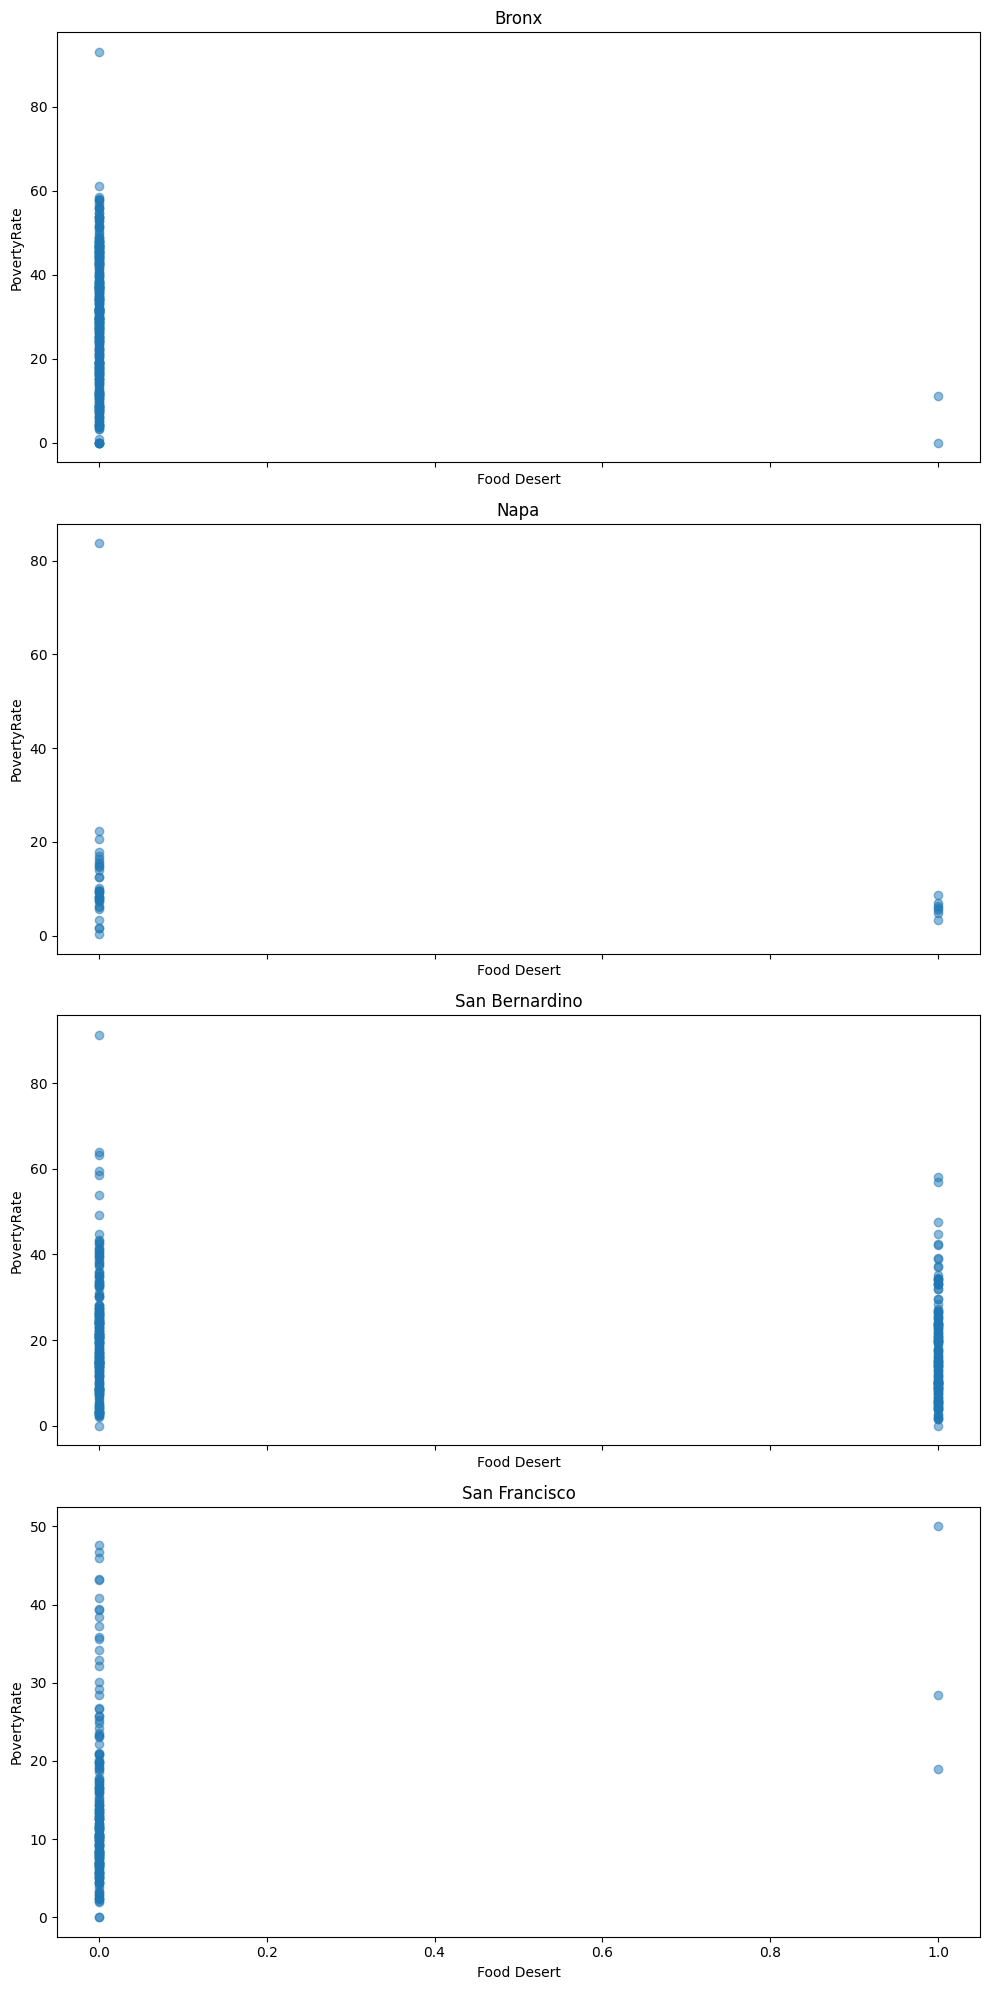

In [6]:
fig, axs = plt.subplots(len(selected_counties), 1, figsize=(10, 5 * len(selected_counties)), sharex=True)

# Iterate through selected counties and plot scatter plots
for i, county in enumerate(selected_counties):
    county_data = df[df['County'] == county]
    
    # Scatter plot
    axs[i].scatter(county_data['LA1and10'], county_data['PovertyRate'], alpha=0.5)
    
    # Customize the plot
    axs[i].set_title(county)
    axs[i].set_xlabel('Food Desert')
    axs[i].set_ylabel('PovertyRate')

plt.tight_layout()
plt.show()